<양자역학:해밀토니안을 구해보자>

In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [16]:
#x-axis range
start=0
end=1
ep=0.1
num=((end-start)/ep)+1
a=end-start

#constants
hbar=1
m=1
w=1

#x=[0:a/(N-1):a]
x=torch.linspace(start, end, int(num))#x=[0:ep:a]
y=torch.linspace(start, end, int(num))#x=[0:ep:a] 
z=torch.linspace(start, end, int(num))#x=[0:ep:a] 

N=len(x)
print(x.size())


torch.Size([11])


In [17]:
identity_matrix = torch.eye(N)  
off_diag = torch.ones(N-1) 
K_1D = (1/ep**2)*((-hbar**2 / (2 * m) * (-2 * identity_matrix + torch.diag(off_diag, 1) + torch.diag(off_diag, -1))))

# 3D 운동 에너지 연산자 K = K_x ⊗ I ⊗ I + I ⊗ K_y ⊗ I + I ⊗ I ⊗ K_z
K_x = torch.kron(torch.kron(K_1D, torch.eye(N, dtype=torch.float64)), torch.eye(N, dtype=torch.float64))
K_y = torch.kron(torch.kron(torch.eye(N, dtype=torch.float64), K_1D), torch.eye(N, dtype=torch.float64))
K_z = torch.kron(torch.kron(torch.eye(N, dtype=torch.float64), torch.eye(N, dtype=torch.float64)), K_1D)

K = K_x + K_y + K_z
print(K.size())  

# 3D 무한 퍼텐셜 우물: V_infi
V_infi_1D = torch.zeros(N, N, dtype=torch.float64)
V_infi_1D[0, 0] = 1e10
V_infi_1D[N-1, N-1] = 1e10

V_infi = torch.kron(torch.kron(V_infi_1D, torch.eye(N, dtype=torch.float64)), torch.eye(N, dtype=torch.float64)) + \
         torch.kron(torch.kron(torch.eye(N, dtype=torch.float64), V_infi_1D), torch.eye(N, dtype=torch.float64)) + \
         torch.kron(torch.kron(torch.eye(N, dtype=torch.float64), torch.eye(N, dtype=torch.float64)), V_infi_1D)

print(V_infi.size()) 

# 3D 해밀토니안 H = K + V_infi
H = K + V_infi
print(H.size())  

torch.Size([1331, 1331])
torch.Size([1331, 1331])
torch.Size([1331, 1331])


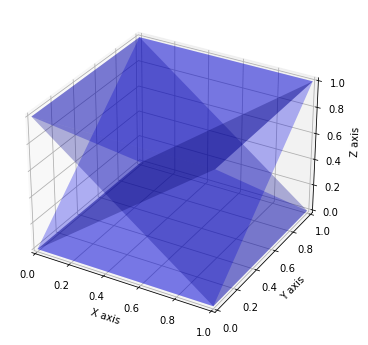

In [29]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

a = 1

# 박스의 면을 정의
r = [0, a]
X, Y = np.meshgrid(r, r)

# 각 면에 대한 z 축 위치
ax.plot_surface(X, Y, np.array([[0, 0], [0, 0]]), color='b', alpha=0.3)  # z=0 plane
ax.plot_surface(X, Y, np.array([[a, a], [a, a]]), color='b', alpha=0.3)  # z=a plane

# 각 면에 대한 y 축 위치
ax.plot_surface(X, np.array([[0, 0], [a, a]]), Y, color='b', alpha=0.3)  # y=0 plane
ax.plot_surface(X, np.array([[a, a], [0, 0]]), Y, color='b', alpha=0.3)  # y=a plane

# 각 면에 대한 x 축 위치
ax.plot_surface(np.array([[0, 0], [a, a]]), X, Y, color='b', alpha=0.3)  # x=0 plane
ax.plot_surface(np.array([[a, a], [0, 0]]), X, Y, color='b', alpha=0.3)  # x=a plane

# 축 레이블 설정
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# 축 범위 설정
ax.set_xlim([0, a])
ax.set_ylim([0, a])
ax.set_zlim([0, a])

plt.show()

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Infinite Potential Well')

plt.show()


In [18]:
#true value
def eigen(Ht):
    eigenvals , eigenvecs = torch.linalg.eigh(Ht)
    return eigenvals , eigenvecs

evals , eigenvecs_tr=eigen(H)

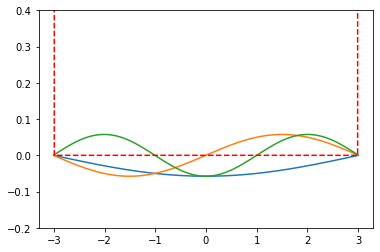

In [85]:
plt.figure()
for i in range(0,3):
    plt.plot(x, eigenvecs_tr[:,i])
    plt.ylim(-0.2,0.4)
plt.plot(x, 1e-1*potential_flat(hp['ptl_f']), "r--")
plt.show()

#plt.yticks(np.arange(-0.4,0.5,0.1))


In [11]:
#Energy_true(analytic 계산*교과서 참고)
E_nn = []
for x in range(1, 10):
    for y in range(1, 10):
        for z in range(1, 10):
            E_n = (x**2 + y**2 + z**2)*((np.pi*hbar)**2/(2*m*a**2))
            E_nn.append(E_n)

E_n_tensor = torch.tensor(E_nn)
E_n_sorted, _ = torch.sort(E_n_tensor)

print(E_n_sorted[:30])


tensor([ 14.8044,  29.6088,  29.6088,  29.6088,  44.4132,  44.4132,  44.4132,
         54.2828,  54.2828,  54.2828,  59.2176,  69.0872,  69.0872,  69.0872,
         69.0872,  69.0872,  69.0872,  83.8916,  83.8916,  83.8916,  88.8264,
         88.8264,  88.8264,  93.7612,  93.7612,  93.7612, 103.6308, 103.6308,
        103.6308, 103.6308])


In [19]:
#energy cal 
evals[0:30]

tensor([14.6830, 28.8870, 28.8870, 28.8870, 43.0909, 43.0910, 43.0910, 51.0102,
        51.0102, 51.0102, 57.2949, 65.2141, 65.2141, 65.2141, 65.2141, 65.2141,
        65.2141, 78.8870, 78.8870, 78.8870, 79.4181, 79.4181, 79.4181, 87.3373,
        87.3373, 87.3373, 93.0909, 93.0909, 93.0909, 93.0909],
       dtype=torch.float64)

In [20]:
'''
cv=evals/evals[0]
for i in range(10):
    print(cv[i+1]-cv[i])
''' 

'\ncv=evals/evals[0]\nfor i in range(10):\n    print(cv[i+1]-cv[i])\n'

In [30]:
class VModule(nn.Module):
    def __init__(self, *args, **kwargs):
        super(VModule, self).__init__(*args, **kwargs)
        
        self.layer = nn.Sequential(
            nn.Linear(N,   1000), nn.ReLU(),
            nn.Linear(1000,  500), nn.ReLU(),
            nn.Linear(500,  1000), nn.ReLU(),
            nn.Linear(1000, N)
        )
    def forward(self, evl):
        evl = evl.view(N,N,N)
        return self.layer(evl).view(-1)


In [31]:
module=VModule()
L2loss = torch.nn.MSELoss(reduction="mean")
relu = nn.ReLU()
relu_e = lambda x, e: relu(x - e)

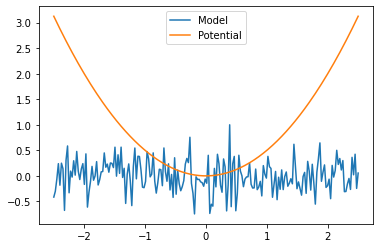

In [31]:
v = module(evals).detach()
plt.plot(x, v/v.max(), label="Model")
plt.plot(x, V_ho_flat, label="Potential")
plt.legend()

In [32]:
opt = torch.optim.Adam(module.parameters(), lr=0.01)


losss=[]
epoches = 500
for epoch in range(epoches):

    v = module(evals)
    v = v-v.min()
    v = v/v.max()
    V = torch.diag(v)
    H_m = K+V
    evals_m, evec = eigen(H_m)
    max_diff = 0.1

    #loss_symmetry = L2loss(v, torch.flip(v, [0]))
    loss_dif = (1000/(epoch+2))*torch.max(relu_e(torch.diff(evals_m), max_diff))
    #print(loss_dif.item())
    # 양끝 1 condition
    loss_eigen = 200*L2loss(evals_m, evals)
    loss_v0 = (v[0]-1)**2
    
    loss = loss_eigen + loss_v0 + loss_dif #+ loss_symmetry
    losss.append(loss.item())
    

    print(f"{loss_eigen/loss:.3}|{loss_dif/loss:.3}|{0/loss:.3}")
    print(f"{epoch}   :    {loss.item()}")
    #loss = 200*L2loss(evals_m, evals) + (torch.max(v)-1)**2 + loss_dif
    

    opt.zero_grad()
    loss.backward()
    opt.step()

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

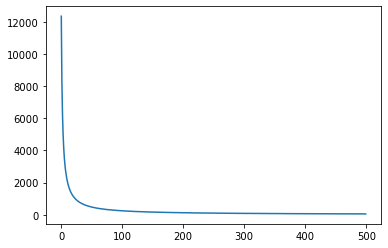

In [33]:
plt.figure()
plt.plot(range(epoches),losss)
plt.show()

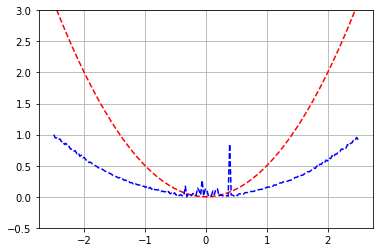

In [35]:
#V_flat_model=torch.diag(Vdiag_model.detach())

plt.figure()
plt.plot(x, V_ho_flat, 'c--', color='r')
plt.plot(x, v.detach() , 'c--', color='b')
#plt.xlim(-1,6)
plt.ylim(-0.5,3)
plt.grid(True)
plt.show()


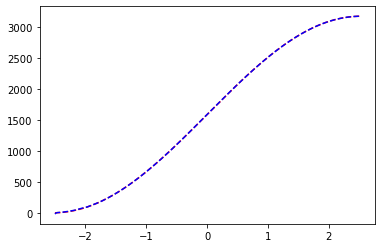

In [16]:
H_model_up=K+v.detach()
eigenvals_up , eigenvecs_up = eigen(H_model_up)

plt.figure()
plt.plot(x,evals, 'c--', color='r')
plt.plot(x,eigenvals_up, 'c--', color='b')
plt.show()